In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
datafolder = os.path.join("datasets", "lifesat", "")
print(datafolder + "gdp_per_capita.csv")


datasets\lifesat\gdp_per_capita.csv


In [3]:
# load the data
oecd_bli = pd.read_csv(datafolder + 'oecd_bli_2015.csv', 
                        thousands=',')
gdp_per_capita = pd.read_csv(datafolder + 'gdp_per_capita.csv',
                              thousands=',',
                              delimiter='\t',
                              encoding='latin1',
                              na_values='n/a')

In [4]:
# function to prepare the data above
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country",
                              columns="Indicator",
                              values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli,
                                  right=gdp_per_capita,
                                  left_index=True,
                                  right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [5]:
#prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


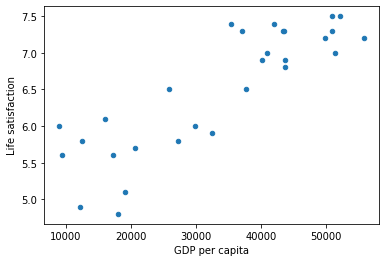

In [6]:
# visualize the data
country_stats.plot(kind='scatter', 
                    x="GDP per capita", 
                    y='Life satisfaction')
plt.show()

In [7]:
# select a linear model
model = sklearn.linear_model.LinearRegression()

In [8]:
# train the model
model.fit(X, y)

LinearRegression()

In [9]:
model.fit(X,y).score(X,y)

0.7344414355437031

In [10]:
model.fit(X,y).coef_

array([[4.91154459e-05]])

In [11]:
model.fit(X,y).intercept_

array([4.8530528])

In [12]:
# make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new))  # outputs [[ 5.96242338]]


[[5.96242338]]


In [13]:
y_pred = model.predict(X)

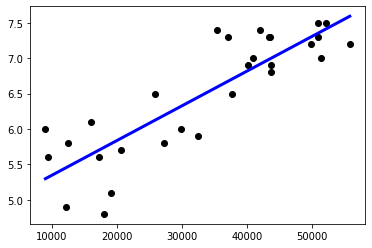

In [14]:
plt.scatter(X,y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [15]:
# replace LinearRegression with KneighborRegression
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)

In [16]:
# train the model
model.fit(X, y)


KNeighborsRegressor(n_neighbors=2)

In [17]:
model.fit(X,y).score(X,y)

0.9091881835016248

In [18]:
y_pred = model.predict(X)

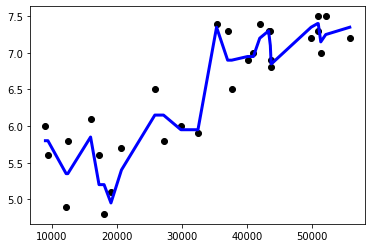

In [19]:
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

In [20]:
# make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new))  # outputs [[ 5.96242338]]


[[6.1]]
